
<h3> Importing necessary libraries </h3>

In [ ]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
restartkernel()

In [2]:
import qlayers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

Enter number of qubits (default=4): 4
Which circuits do you want to select? Separate each option by 1 space.
1 2 3 4 5
1. <Quantum Keras Layer: func=qnode1>
2. <Quantum Keras Layer: func=qnode2>
3. <Quantum Keras Layer: func=qnode3>
4. <Quantum Keras Layer: func=qnode4>
5. <Quantum Keras Layer: func=qnode5>


<h3> Instantiating and visualizing the Diabetes dataset from Scikit-Learn </h3>

In [8]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# load the dataset but dont plot it (since it is 10 dimensional) 
data, targets = load_diabetes(return_X_y = True) 
targets /= 346
print(tf.shape(data))
# print(targets)
print(tf.shape(targets)) 
# dont need since the target is a value between 25 and 346
# y_hot = tf.keras.utils.to_categorical(targets, num_classes=2)  # one-hot encoded labels

tf.Tensor([442  10], shape=(2,), dtype=int32)
tf.Tensor([442], shape=(1,), dtype=int32)


<h3> Creating model with classical and quantum layers </h3> 

In [9]:
tf.keras.backend.set_floatx('float64')

print(qlayers.list_of_qlayers)
clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qlayers.list_of_qlayers[0]
qlayer_2 = qlayers.list_of_qlayers[1]
# clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
clayer_2 = tf.keras.layers.Dense(2, activation="relu")

[<Quantum Keras Layer: func=qnode1>, <Quantum Keras Layer: func=qnode2>, <Quantum Keras Layer: func=qnode3>, <Quantum Keras Layer: func=qnode4>, <Quantum Keras Layer: func=qnode5>]


In [10]:
# construct the model
inputs = tf.keras.Input(shape=(10,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
# 0.2 - way too high
# 0.05 - too high
# 0.02 - workable, likely will need to be lower as training goes on for longer
# 0.01 - very good
# 0.001 - stable, but converges very slowly
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(opt, loss="mean_squared_error")

# the model stabilizes around epoch 5, test to at least 20 epochs for 4 qubits and layers 1-2
# seems to follow this trend for other quantum layer parameters
# fitting = model.fit(data, targets, epochs=6, batch_size=5, validation_split=0.25, verbose=1)
fitting = model.fit(data, targets, epochs=20, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/20
67/67 [==============================] - 27s 408ms/step - loss: 0.1750 - val_loss: 0.1470
Epoch 2/20
67/67 [==============================] - 29s 426ms/step - loss: 0.1365 - val_loss: 0.1396
Epoch 3/20
67/67 [==============================] - 28s 424ms/step - loss: 0.1340 - val_loss: 0.1385
Epoch 4/20
67/67 [==============================] - 31s 462ms/step - loss: 0.1333 - val_loss: 0.1398
Epoch 5/20
67/67 [==============================] - 26s 384ms/step - loss: 0.1327 - val_loss: 0.1382
Epoch 6/20
67/67 [==============================] - 29s 440ms/step - loss: 0.1327 - val_loss: 0.1386
Epoch 7/20
67/67 [==============================] - 29s 437ms/step - loss: 0.1325 - val_loss: 0.1390
Epoch 8/20
67/67 [==============================] - 29s 427ms/step - loss: 0.1331 - val_loss: 0.1385
Epoch 9/20
67/67 [==============================] - 31s 455ms/step - loss: 0.1324 - val_loss: 0.1383
Epoch 10/20
67/67 [==============================] - 26s 389ms/step - loss: 0.1341 - val_lo

# qlayer_1.get_weights()

In [12]:
qlayer_2.get_weights()

[array([ 0.57821046, -0.83626895, -0.8184806 , -0.25081627])]

<h3> Result Plots </h3>

In [13]:
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

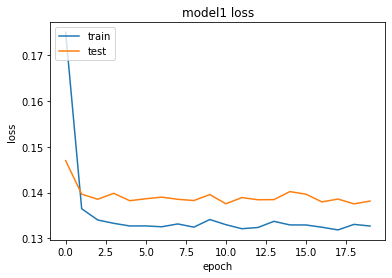

In [14]:
# plot_history(fitting, "ACC", 1)
plot_history(fitting, "LOSS", 1)